<a href="https://colab.research.google.com/github/Ele975/Machine_learning/blob/main/binary_classification_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt




In [ ]:
 (train_data, train_label), (test_data, test_label) = imdb.load_data(num_words=10000)
print(train_data)
print(train_label)

17464789/17464789 [==============================] - 0s 0us/step
[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19

In [ ]:
#preprocess data

#features
def vectorize(data, dim):
  result = np.zeros((len(data), dim))
  for i, sequence in enumerate(data):
    result[i,sequence] = 1.
  return result

x_train = vectorize(train_data, 10000)
x_test = vectorize(test_data, 10000)

# labels
y_train = np.asarray(train_label).astype('float32')
y_test = np.asarray(test_label).astype('float32')



In [ ]:
# build model using Sequential

model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
  optimizer='rmsprop',
  loss='binary_crossentropy',
  metrics=['accuracy']
)

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs = 6,
    batch_size = 512,
    validation_data = (x_val, y_val)
)

Epoch 1/6
30/30 [==============================] - 7s 56ms/step - loss: 0.6172 - accuracy: 0.6465 - val_loss: 0.4907 - val_accuracy: 0.8380
Epoch 2/6
30/30 [==============================] - 1s 25ms/step - loss: 0.4808 - accuracy: 0.7873 - val_loss: 0.3784 - val_accuracy: 0.8704
Epoch 3/6
30/30 [==============================] - 1s 25ms/step - loss: 0.3988 - accuracy: 0.8448 - val_loss: 0.3198 - val_accuracy: 0.8805
Epoch 4/6
30/30 [==============================] - 1s 25ms/step - loss: 0.3404 - accuracy: 0.8760 - val_loss: 0.2894 - val_accuracy: 0.8893
Epoch 5/6
30/30 [==============================] - 1s 26ms/step - loss: 0.2953 - accuracy: 0.8954 - val_loss: 0.2789 - val_accuracy: 0.8909
Epoch 6/6
30/30 [==============================] - 1s 23ms/step - loss: 0.2584 - accuracy: 0.9123 - val_loss: 0.2771 - val_accuracy: 0.8910


In [ ]:
#info to plot
history_dic = history.history
loss = history_dic['loss']
v_loss = history_dic['val_loss']
accuracy = history_dic['accuracy']
v_accuracy = history_dic['val_accuracy']
epochs = range(1, len(loss) + 1)



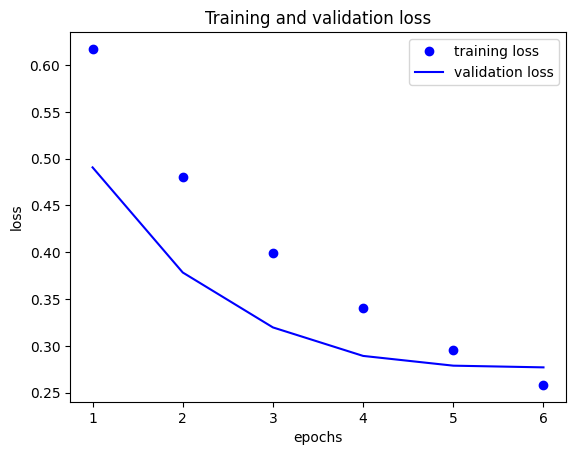

In [ ]:
plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, v_loss, 'b', label='validation loss')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

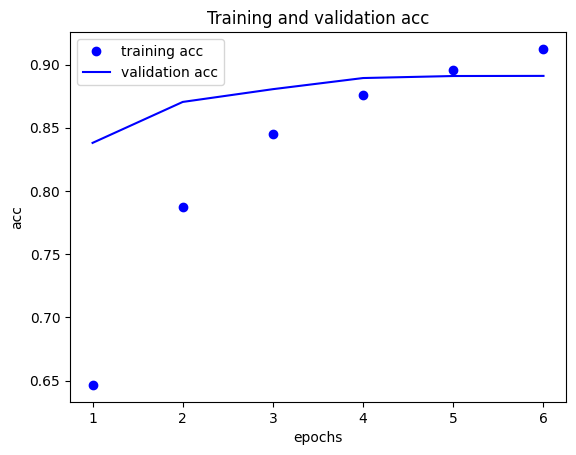

In [ ]:
plt.plot(epochs, accuracy, 'bo', label='training acc')
plt.plot(epochs, v_accuracy, 'b', label='validation acc')
plt.title('Training and validation acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

In [ ]:
#test set
res = model.evaluate(x_test,y_test)
res
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.15105629],
       [0.9963282 ],
       [0.90964764],
       ...,
       [0.054878  ],
       [0.0746412 ],
       [0.5610949 ]], dtype=float32)

In [ ]:
# build model using Functional API

inputs = keras.Input(shape=(10000,), name='my_input')
features1 = layers.Dense(16, activation='relu')(inputs)
adjust1 = layers.Dropout(.5)(features1)
features2 = layers.Dense(16, activation='relu')(adjust1)
adjust2 = layers.Dropout(.5)(features2)
outputs = layers.Dense(1, activation='sigmoid')(adjust2)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

model.compile(
    optimizer='rsmprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
    )

history2 = model.fit(
    partial_x_train,
    partial_y_train,
    epochs = 6,
    batch_size = 512,
    validation_data = (x_val, y_val)
)



Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 10000)]           0         
                                                                 
 dense_21 (Dense)            (None, 16)                160016    
                                                                 
 dropout_14 (Dropout)        (None, 16)                0         
                                                                 
 dense_22 (Dense)            (None, 16)                272       
                                                                 
 dropout_15 (Dropout)        (None, 16)                0         
                                                                 
 dense_23 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainab